# The Machine Learning Workflow Annotated

Source: [Pytorch / Learn the Basics](https://pytorch.org/tutorials/beginner/basics/intro.html)

```{attention} Dataset
- [ ] Understand the structure of the FashionMNIST dataset
- [ ] Represent its contents appropriately
- [ ] Understand the purpose of the dataset loading options
```

```{attention} Inference
- [ ] Load the pre-trained neural network model
- [ ] Understand its output
- [ ] Use it for classification
- [ ] Use it in batched mode
- [ ] Evaluate the confidence in its answers
- [ ] Understand the components it uses
- [ ] Get the model parameters
- [ ] Replicate manually its computation
```

```{attention} Learning
- [ ] Understand the loss function concept
- [ ] Understand what cross-entropy computes
- [ ] Understand what data loader does (at a high-level)
- [ ] Understand what the training loop does (at a high-level)
- [ ] Estimate model accuracy
- [ ] Save a model
```

In [1]:
import torch
import torchvision

## The FashionMNIST Dataset 

In [2]:
# Download training data from open datasets.
training_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)

# Download test data from open datasets.
test_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)

In [3]:
# by default: training data set, no input/output transform, no download
data = torchvision.datasets.FashionMNIST(root="data") 
data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train

In [4]:
# data is list-like ; each item in an input-output pair
datum = data[0]
datum

(<PIL.Image.Image image mode=L size=28x28>, 9)

In [5]:
image, index = datum

In [6]:
image

In [7]:
# The output is a number that denotes the class of the pictured object. 
# The list of classes is:
print(data.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [8]:
# Get the category name from the index:
data.classes[index] # that checks out!

'Ankle boot'

In [9]:
import pandas as pd
df = [{"image": image, "class": data.classes[index]} for image, index in data]
df = pd.DataFrame(df)
df

,image,class
0,<PIL.Image.Image image mode=L size=28x28 at 0x...,Ankle boot
1,<PIL.Image.Image image mode=L size=28x28 at 0x...,T-shirt/top
2,<PIL.Image.Image image mode=L size=28x28 at 0x...,T-shirt/top
3,<PIL.Image.Image image mode=L size=28x28 at 0x...,Dress
4,<PIL.Image.Image image mode=L size=28x28 at 0x...,T-shirt/top
...,...,...
59995,<PIL.Image.Image image mode=L size=28x28 at 0x...,Sandal
59996,<PIL.Image.Image image mode=L size=28x28 at 0x...,Trouser
59997,<PIL.Image.Image image mode=L size=28x28 at 0x...,Dress
59998,<PIL.Image.Image image mode=L size=28x28 at 0x...,T-shirt/top


In [10]:
df.head()

,image,class
0,<PIL.Image.Image image mode=L size=28x28 at 0x...,Ankle boot
1,<PIL.Image.Image image mode=L size=28x28 at 0x...,T-shirt/top
2,<PIL.Image.Image image mode=L size=28x28 at 0x...,T-shirt/top
3,<PIL.Image.Image image mode=L size=28x28 at 0x...,Dress
4,<PIL.Image.Image image mode=L size=28x28 at 0x...,T-shirt/top


In [11]:
import base64
import io
from IPython.display import HTML

def image_formatter(image):
    with io.BytesIO() as buffer:
        image.save(buffer, "jpeg")
        _bytes = buffer.getvalue()
    _base64 = base64.b64encode(_bytes).decode("ascii")
    return f'<img src="data:image/jpeg;base64, {_base64}">'

HTML(df.head().to_html(formatters={'image': image_formatter}, escape=False))

,image,class
0,"<img src=""data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/APn+tbw1oNx4m8QWmkWx2yXD4LkZCADJJ+gFbviL4a63oc7COE3MW4hdn38duD976jNc9daDqllIsc9lKrMu4YGeMkdR7gj8KzcV7H8BtEvV16+1iWCeG1Wz8mOV02pIzupwCeuAp6Z98cZ90aIzLIlw0c0ZJ4KgjHoeOa+evjS9n/wnMcNxBPCYLKONFhA2FNzMpGenDcgd816V4K03wefC+m3NlpVhP+5QSXBiR5fMx825iMg5zwce3FdbOzTwgW90lu6uCm8eYrL02soIyCPQgggEdMGQ3cluiPNK0rJwrRQBNueuMkt+teNfGKxsdY8WWdxNqcNo66eieXMwVsb5DnH415Hp2rajpE5n02/urOUjBe3laMkehIPIrVm8eeLrhNknibVivoLtx/I1UPinxC3XXtUP1vJP8ay5JZJpGkldnduSzHJP41//2Q=="">",Ankle boot
1,"<img src=""data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/AOB+E3gyz8V6xez6lE01jYRqWiDFQ8jk7QSOcYVjxjoK9hlufDultLpcPhSa5itZdjra6NFNCshiEh5Yj5tmCTTjpvhnxg9zYX/huSCe3SMyLeWC20yI+7aUZTnb8jcA446V81a7pcmh69qGlytue0uHh3f3gpIB/Ec/jXSeBfiJf+CvMt7ezsp7a4lV5vORg/HHDKR2z1z1NfQF94U8Oapez3l7o9vczzkGSSR5MvjAGcMB0C9B2rC8Uz2Xw28LXGp+HdIsoJ5JIoCr+YyNyx5y2eMtjBHJr5517WrrxFrdzq16sS3FwwLiJdqjAAGB9AKzq+zkXjAAGcnivP8A4zLu8ATf7N1C/wCrD+tfONFfUf8AwlV5AmBbWrbQACwf0Ho1cV8S/Edzqfg66t5be2RTLFzGHzw2e7GvEa//2Q=="">",T-shirt/top
2,"<img src=""data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/APn+vX/DGqaVa6HZw6r4X07VQIFMLyxqrpkZIJ2/MM5P4nrXH+PZUuLu0njs7a0VlcLDbRBERQRhRgc49fc1yFFenaeANMsx6QRj/wAdFc/41H7uwOOcyc+3yf8A165GivUbVSlnAh6rEgP/AHyKwPGa7rK0fH3JGHX1A/wrjaK6zRPEN5Ni2mWKQImA7Kdxx6kGsfWdXudSmEc2xY4idqRjAz6nPJNZdf/Z"">",T-shirt/top
3,"<img src=""data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/APHfBp0z/hKLRdWSNrd22KZseWrnhS4PG3PXPHc8A17c95bWoiiawsW8n/VK9oj+Uf8AZ4+X8K434kXmnXOjGe9t4n1CZgttKiBZMjqS2MlQD0Oeo6da8lor3OZzeQWsqFGZ7dCwEijB2D34rg/iIXM2nbiCPLfowIByCeh9MVxFaGh2iX+uWVtIu6N5V3r6qOSPyBr1eS1iklWZoIWdoppM+WOQFBB6fWs7xzpUUnhiSWKFFNrLn5VA29PTsVZPyFeU1c0vUZdJ1GK9gSN5It20SAleVI7EetdHJ441P7NbuILMGOLygAjYKkMv970qvqPjrVdTsLi0mitEW4wJHjjIY4VV9cdFHauYr//Z"">",Dress
4,"<img src=""data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAAcABwBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/APn+vp6f4feFNcg0LUIfDdlsleJrrypGgAt2iZtwVGUFg5TsSRn8PJ/jTYWGm+NbeDTrK2tIfsEbGO2iWNSxZ+cDvjAz

In [12]:
# Pytorch only want to deal with numeric array called "tensors", not images.
# So, we need to transform the input
image_to_tensor = torchvision.transforms.ToTensor()
t = image_to_tensor(image)
t

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [13]:
t.shape, t.dtype

(torch.Size([1, 28, 28]), torch.float32)

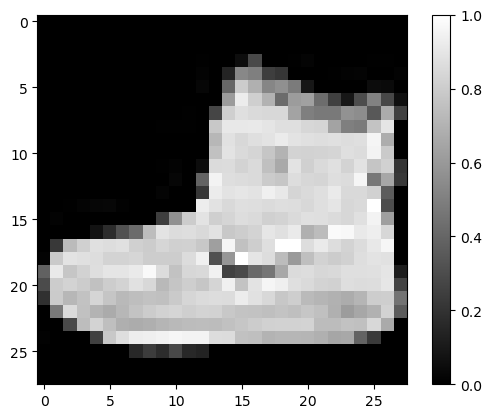

In [14]:
# No information has been lost in the conversion process!
import matplotlib.pyplot as plt
plt.imshow(t.squeeze(), cmap="grey")
plt.colorbar()
None

## Neural Network Model

The model architecture is going to assign to each image input the vector of probability $p_i$ that the item belongs to the $i$th class.
The class prediction is simply the class with the highest probability, but the fact that all $p_i$ are known allows us to evaluate the trust that we should have in the prediction.

The nitty-gritty details: the model does actually not output the probabilities $p_i \in [0, 1]$ directly but the corresponding unnormalized log probabilities
    $$
    \ell_i := \log p_i + c
    $$
because any value in $\mathbb{R}^{10}$ can be interpreted as vector of unnormalized log probabilies, this parameter is "free", devoid of constraints, in $\mathbb{R}^{10}$, so every possible output of or neural network is a valid value,
while the vector of probabilities is constrained.

If needed, compute $p_i$ with:
    $$
    p_i = \frac{\exp \ell_i}{\sum_{j=0}^{9} \exp \ell_j}.
    $$
The pytorch [`softmax`](https://pytorch.org/docs/stable/generated/torch.nn.functional.softmax.html) function implements this operation.

In [15]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = torch.nn.Flatten()
        self.linear_1 = torch.nn.Linear(28*28, 512)
        self.relu_1 = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(512, 512)
        self.relu_2 = torch.nn.ReLU()
        self.linear_3 = torch.nn.Linear(512, 10)

    def forward(self, image_tensor):
        image_flat = self.flatten(image_tensor)
        x_0 = image_flat
        x_1 = self.linear_1(x_0)
        x_1 = self.relu_1(x_1)
        x_2 = self.linear_2(x_1)
        x_2 = self.relu_2(x_2)
        x_3 = self.linear_3(x_2)
        logits = x_3
        return logits

In [16]:
model = NeuralNetwork()
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_1): Linear(in_features=784, out_features=512, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=512, out_features=512, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=512, out_features=10, bias=True)
)

In [17]:
# Load the (trained) model state for this architecture
model.load_state_dict(torch.load("models/base-model.pth"))

<All keys matched successfully>

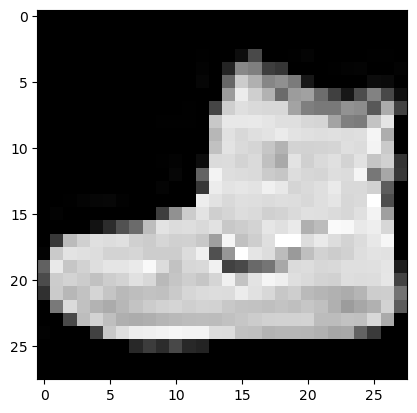

In [18]:
image_tensor, cls = training_data[0]
plt.imshow(image_tensor.squeeze(), cmap="grey")
plt.grid(False)
None

In [19]:
with torch.no_grad():
    logits = model(image_tensor)
logits = logits.squeeze()
logits

tensor([ -5.0635, -10.2997,  -2.5343,  -3.8617,  -1.4204,   6.7209,  -1.7712,
          4.3737,   5.1194,   8.8152])

In [20]:
probas = torch.nn.functional.softmax(logits, dim=-1)
probas

tensor([8.0939e-07, 4.3064e-09, 1.0153e-05, 2.6920e-06, 3.0927e-05, 1.0618e-01,
        2.1777e-05, 1.0155e-02, 2.1407e-02, 8.6219e-01])

In [21]:
probas_dict = {training_data.classes[i]: p.item() for i, p in enumerate(probas)}
probas_dict

{'T-shirt/top': 8.093874157566461e-07,
 'Trouser': 4.306432099809854e-09,
 'Pullover': 1.0152617505809758e-05,
 'Dress': 2.691969712032005e-06,
 'Coat': 3.0927330954000354e-05,
 'Sandal': 0.10618074238300323,
 'Shirt': 2.177722126361914e-05,
 'Sneaker': 0.010154898278415203,
 'Bag': 0.021406900137662888,
 'Ankle boot': 0.8621910810470581}

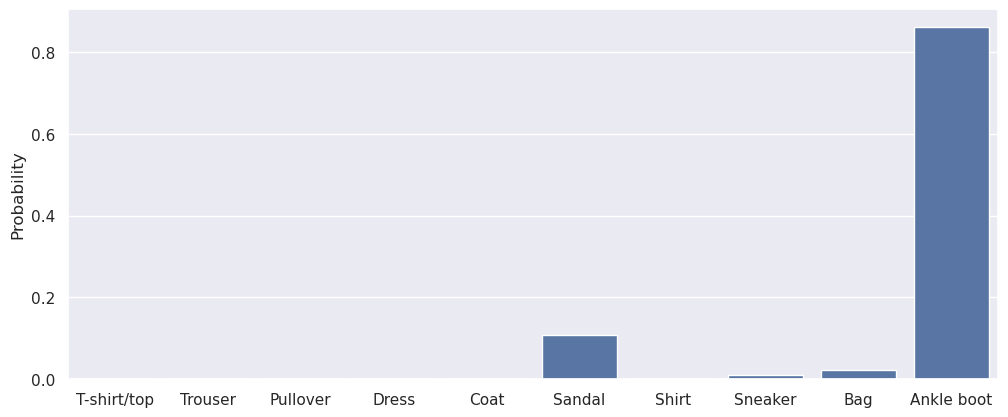

In [22]:
import seaborn as sns; sns.set_theme()
sns.barplot(probas_dict)
plt.gcf().set_figwidth(12)
plt.gca().set_ylabel("Probability")
None

### Batched Prediction

In [23]:
images = []
for i, (image, _) in enumerate(training_data):
    if i >= 10:
        break
    images.append(image)
images_tensor = torch.cat(images)
images_tensor

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.

In [24]:
with torch.no_grad():
    output = model(images_tensor)
output

tensor([[ -5.0635, -10.2997,  -2.5343,  -3.8617,  -1.4204,   6.7209,  -1.7712,
           4.3737,   5.1195,   8.8152],
        [  7.5105,  -0.8102,   2.5687,   2.8657,   0.7035,  -5.3199,   4.3796,
          -8.6883,  -1.0414,  -4.6456],
        [  1.5420,   2.6097,   0.2043,   2.5372,   0.9034,  -2.1826,   1.0051,
          -2.8838,  -1.7813,  -2.7010],
        [  3.4631,   2.3332,   1.6350,   2.6722,   1.4257,  -3.6585,   2.3974,
          -5.5100,  -1.9757,  -4.1755],
        [  3.0631,   3.7802,  -0.1755,   5.3393,   1.6590,  -4.6100,   1.9257,
          -5.7356,  -1.9763,  -4.9247],
        [  1.7434,  -2.6086,   5.3427,  -0.6650,   4.0233,  -3.1444,   4.2314,
          -7.2025,   0.5431,  -4.2442],
        [ -3.5351,  -4.3576,  -2.5228,  -1.9914,  -1.1599,   4.7374,  -1.8257,
           6.3088,   2.1861,   2.9703],
        [  0.4537,  -5.7180,   5.9191,  -2.8125,   4.6158,  -1.8757,   4.4393,
          -6.9481,   2.4362,  -2.6177],
        [ -0.6416,  -2.3333,  -0.7706,  -0.8070,

### Parameters

In [25]:
for p in model.parameters():
    print(f"type: {type(p.data).__name__}, shape: {tuple(p.shape)!s:<10}, data type: {p.dtype}")

type: Tensor, shape: (512, 784), data type: torch.float32
type: Tensor, shape: (512,)    , data type: torch.float32
type: Tensor, shape: (512, 512), data type: torch.float32
type: Tensor, shape: (512,)    , data type: torch.float32
type: Tensor, shape: (10, 512) , data type: torch.float32
type: Tensor, shape: (10,)     , data type: torch.float32


```{tip} Model Size
How many scalar parameters describe the model? What is the corresponding model size in MB?
```

In [26]:
num_params = 0
for p in model.parameters():
    num_params += torch.prod(torch.tensor(p.shape)).item()

There are {eval}`num_params` ($\approx$ {eval}`num_params // 1_000`K) parameters in the model. The size of each parameter is 4B, hence the total size is {eval}`round(num_params * 4 / 1_000_000, 1)`MB.

### Under the Hood

#### Flatten

In [27]:
model.flatten

Flatten(start_dim=1, end_dim=-1)

In [28]:
t = image
t

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0431,
          0.5569, 0.7843, 0.4157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.3333, 0.7255, 0.4392, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5961, 0.8392,
          0.8510, 0.7608, 0.9255, 0.8471, 0.7333, 0.5843, 0.5294, 0.6000,
          0.8275, 0.8510, 0.9059, 0.8039, 0.8510, 0.7373, 0.1333, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2588, 0.7255, 0.6510,
          0.7059, 0.7098, 0.7451, 0.8275, 0.8667, 0.7725, 0.5725, 0.7765,
          0.8078, 0.7490, 0.6588, 0.7451, 0.6745, 0.7373, 0.6863, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5294, 0.6000, 0.6275,
          0.6863, 0.7059, 0.6667, 0.7294, 0.7333, 0.7451, 0.7373, 0.7451,
          0.7333, 0.6824, 0.7647, 0.7255, 0.6824, 0.6314,

In [29]:
model.flatten(t)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0431, 0.5569,
         0.7843, 0.4157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.3333, 0.7255, 0.4392, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5961, 0.8392,
         0.8510, 0.7608, 0.9255, 0.8471, 0.7333, 0.5843, 0.5294, 0.6000, 0.8275,
         0.8510, 0.9059, 0.8039, 0.8510, 0.7373, 0.1333, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2588, 0.7255,
         0.6510, 0.7059, 0.7098, 0.7451, 0.8275, 0.8667, 0.7725, 0.5725, 0.7765,
         0.8078, 0.7490, 0.6588, 0.7451, 0.6745, 0.7373, 0.6863, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5294,
         0.6000, 0.6275, 0.6863, 0.7059, 0.6667, 0.7294, 0.7333, 0.7451, 0.7373,
         0.7451, 0.7333, 0.6824, 0.7647, 0.7255, 0.6824, 0.6314, 0.6863, 0.2314,
         0.0000, 0.0000, 0.0

#### Linear (Affine) Operator

In [30]:
model.linear_1

Linear(in_features=784, out_features=512, bias=True)

In [31]:
linop = torch.nn.Linear(1, 2)
linop.weight, linop.bias

(Parameter containing:
 tensor([[-0.7706],
         [ 0.3974]], requires_grad=True),
 Parameter containing:
 tensor([ 0.8518, -0.4143], requires_grad=True))

In [32]:
list(linop.parameters())

[Parameter containing:
 tensor([[-0.7706],
         [ 0.3974]], requires_grad=True),
 Parameter containing:
 tensor([ 0.8518, -0.4143], requires_grad=True)]

In [33]:
input = torch.linspace(0.0, 5.0, 6)
input

tensor([0., 1., 2., 3., 4., 5.])

In [34]:
with torch.no_grad():
    input_t = input.reshape(1, -1, 1)
    output_t = linop(input_t)
output = output_t.squeeze()

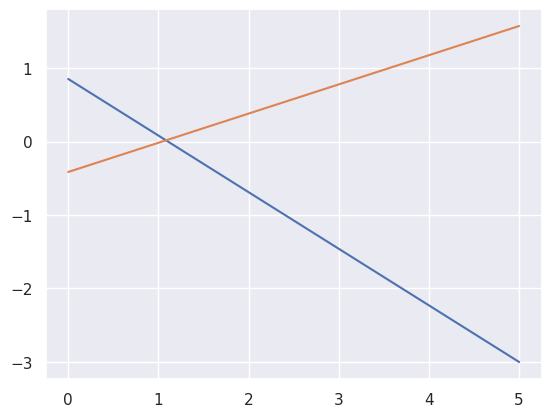

In [35]:
plt.plot(input, output)
None

In [36]:
model.linear_1.in_features == 28 * 28

True

In [37]:
linear_1_params = {name: param.data for name, param in model.linear_1.named_parameters()}
linear_1_params

{'weight': tensor([[ 0.0210, -0.0154,  0.0339,  ...,  0.0224, -0.0339, -0.0155],
         [ 0.0280,  0.0130, -0.0151,  ..., -0.0192, -0.0073,  0.0151],
         [-0.0329, -0.0160,  0.0025,  ...,  0.0269, -0.0198, -0.0071],
         ...,
         [-0.0168,  0.0145,  0.0017,  ...,  0.0345,  0.0356,  0.0282],
         [-0.0032, -0.0066,  0.0123,  ...,  0.0290, -0.0179,  0.0212],
         [ 0.0287,  0.0198, -0.0294,  ..., -0.0113, -0.0313, -0.0064]]),
 'bias': tensor([ 5.1996e-03, -1.2248e-02,  4.4100e-03,  1.1871e-02, -3.1891e-03,
          4.9179e-02,  3.2756e-02,  2.3313e-02, -5.2828e-03, -5.9944e-03,
          4.9043e-03,  2.8898e-02, -5.3561e-03,  4.2246e-04, -1.4582e-02,
          9.8977e-03, -1.4168e-02, -3.5468e-02,  6.6746e-03, -2.8466e-02,
         -3.5134e-02, -3.5082e-02, -1.8402e-03,  1.4411e-02, -9.7980e-03,
         -2.7347e-02,  6.5316e-04, -9.9767e-03, -2.4916e-02, -1.1855e-02,
          4.0395e-02,  2.6589e-02,  3.7311e-02, -5.5242e-03,  1.0600e-02,
          2.8209e-02, 

In [38]:
b1 = linear_1_params["bias"]
b1.shape

torch.Size([512])

In [39]:
A1 = linear_1_params["weight"]
A1.shape

torch.Size([512, 784])

In [40]:
t = image
print(t.shape)
tf = torch.flatten(t)
print(tf.shape)
x1 = A1 @ tf + b1
x1

torch.Size([1, 28, 28])
torch.Size([784])


tensor([ 1.2753e+00,  1.7261e-01,  5.7750e-01, -1.8951e-01,  1.4259e-01,
        -4.6056e-01,  1.5670e-01,  1.3942e+00,  2.3812e+00,  8.1123e-01,
         7.0818e-02,  5.4133e-01,  1.0190e+00, -2.3497e-01,  1.1801e+00,
         9.3983e-01,  1.4187e+00,  4.1639e-01,  5.0212e-03,  3.5274e-01,
        -3.9269e-01, -1.6285e-02,  9.9271e-01,  5.3397e-01,  1.9273e-01,
         8.9256e-01, -2.9343e-01,  6.2997e-01,  9.2869e-01, -1.9725e-01,
         3.8994e-02,  9.6505e-01,  2.1893e-01, -2.0546e-01,  4.3654e-01,
        -3.0981e-01,  6.9837e-02,  7.5683e-01, -2.6560e-01,  8.7648e-01,
        -5.1410e-01, -2.0449e-01,  1.5443e-01, -7.3682e-03,  1.4203e+00,
         1.4900e-01, -3.9682e-01,  3.9538e-01,  1.3069e+00,  3.3200e-01,
         3.8335e-02,  4.5694e-01,  1.0959e-01,  4.9426e-02, -3.1034e-01,
         1.6909e-01,  1.2426e+00, -5.4579e-01,  7.2437e-01, -1.4972e-01,
        -3.2900e-01,  3.3249e-01,  1.1870e+00,  9.1934e-01,  2.6001e-01,
        -2.5835e-02,  2.4629e-01, -9.7872e-02,  4.9

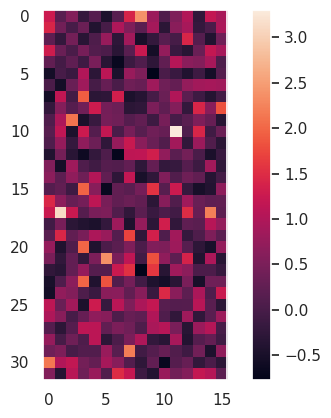

In [41]:
plt.imshow(x1.reshape((2**5, 2**4)))
plt.grid(False)
plt.colorbar()
None

### Rectified Linear Unit

In [42]:
x1 = model.relu_1(x1)
x1

tensor([1.2753, 0.1726, 0.5775, 0.0000, 0.1426, 0.0000, 0.1567, 1.3942, 2.3812,
        0.8112, 0.0708, 0.5413, 1.0190, 0.0000, 1.1801, 0.9398, 1.4187, 0.4164,
        0.0050, 0.3527, 0.0000, 0.0000, 0.9927, 0.5340, 0.1927, 0.8926, 0.0000,
        0.6300, 0.9287, 0.0000, 0.0390, 0.9650, 0.2189, 0.0000, 0.4365, 0.0000,
        0.0698, 0.7568, 0.0000, 0.8765, 0.0000, 0.0000, 0.1544, 0.0000, 1.4203,
        0.1490, 0.0000, 0.3954, 1.3069, 0.3320, 0.0383, 0.4569, 0.1096, 0.0494,
        0.0000, 0.1691, 1.2426, 0.0000, 0.7244, 0.0000, 0.0000, 0.3325, 1.1870,
        0.9193, 0.2600, 0.0000, 0.2463, 0.0000, 0.4980, 0.0000, 0.0000, 0.0000,
        0.0806, 0.0000, 0.2593, 1.0485, 0.6528, 0.5838, 0.9285, 0.0599, 0.0000,
        0.0000, 0.0000, 1.0165, 0.0000, 1.1057, 0.0000, 0.7827, 0.5394, 0.0000,
        0.0309, 0.0000, 0.0000, 0.0000, 0.0000, 0.1505, 0.0369, 0.0000, 0.3281,
        0.8472, 0.0000, 0.3070, 0.0267, 0.3821, 0.3240, 0.8483, 0.3947, 0.2915,
        0.7337, 0.8676, 0.9134, 0.8582, 

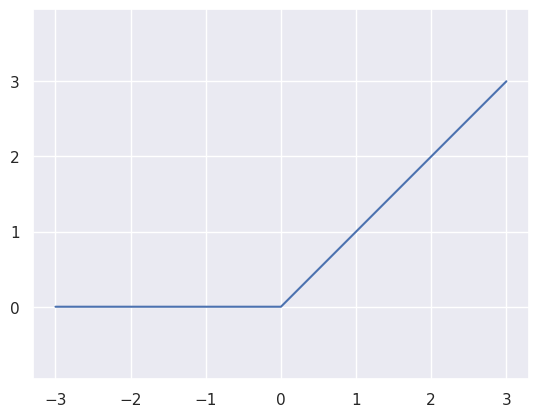

In [43]:
relu = torch.nn.ReLU()
input = torch.linspace(-3.0, 3.0, 7)
relu(input)
plt.plot(input, relu(input))
plt.axis("equal")
None

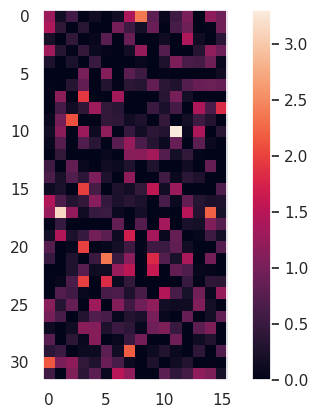

In [44]:
plt.imshow(x1.reshape((2**5, 2**4)))
plt.grid(False)
plt.colorbar()
None

In [45]:
list(model.relu_1.named_parameters())

[]

In [46]:
linear_2_params = {name: param.data for name, param in model.linear_2.named_parameters()}
A2 = linear_2_params["weight"]
b2 = linear_2_params["bias"]
x2 = A2 @ x1 + b2
x2

tensor([-7.9539e-01,  2.1546e-02,  1.9713e+00,  1.4763e+00, -3.5817e-01,
         7.5895e-01,  9.7568e-01, -1.3362e-01,  1.4724e+00, -2.7975e-01,
        -3.9144e-02,  2.3904e-02, -4.7476e-01,  9.1451e-01,  2.7878e-01,
         9.3233e-01,  3.0977e-01, -1.1336e-01, -5.7394e-01, -1.6806e-01,
         9.1612e-01,  1.6612e+00, -1.0209e-01, -6.0533e-01, -2.5323e-01,
        -4.3909e-01,  8.4034e-01, -2.6580e-01, -1.1585e-02,  4.6715e-01,
         1.7898e+00,  6.2534e-01,  1.8791e+00, -4.4379e-02,  1.1543e+00,
        -1.1992e+00, -3.4764e-01, -3.4264e-01, -9.3844e-01,  3.0672e-01,
        -2.6736e-01,  1.9736e+00, -2.7198e-01,  5.6534e-01,  2.4815e+00,
        -7.3440e-01,  6.7933e-02,  2.8126e+00,  4.7092e-01, -4.5178e-03,
         8.2325e-01,  8.3643e-02,  2.6344e-01,  6.7606e-01,  1.6848e+00,
         1.0893e+00, -2.8713e-01,  5.5678e-01,  3.4855e-01,  1.9104e+00,
        -2.1610e-01, -1.9732e-01,  5.7363e-01, -3.2604e-01,  2.7407e-01,
         2.3188e+00,  8.0152e-01,  2.9947e-01,  4.8

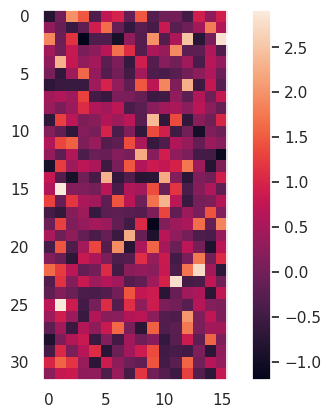

In [47]:
plt.imshow(x2.reshape((2**5, 2**4)))
plt.grid(False)
plt.colorbar()
None

In [48]:
x2 = model.relu_2(x2)
x2

tensor([0.0000e+00, 2.1546e-02, 1.9713e+00, 1.4763e+00, 0.0000e+00, 7.5895e-01,
        9.7568e-01, 0.0000e+00, 1.4724e+00, 0.0000e+00, 0.0000e+00, 2.3904e-02,
        0.0000e+00, 9.1451e-01, 2.7878e-01, 9.3233e-01, 3.0977e-01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 9.1612e-01, 1.6612e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 8.4034e-01, 0.0000e+00, 0.0000e+00, 4.6715e-01,
        1.7898e+00, 6.2534e-01, 1.8791e+00, 0.0000e+00, 1.1543e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0672e-01, 0.0000e+00, 1.9736e+00,
        0.0000e+00, 5.6534e-01, 2.4815e+00, 0.0000e+00, 6.7933e-02, 2.8126e+00,
        4.7092e-01, 0.0000e+00, 8.2325e-01, 8.3643e-02, 2.6344e-01, 6.7606e-01,
        1.6848e+00, 1.0893e+00, 0.0000e+00, 5.5678e-01, 3.4855e-01, 1.9104e+00,
        0.0000e+00, 0.0000e+00, 5.7363e-01, 0.0000e+00, 2.7407e-01, 2.3188e+00,
        8.0152e-01, 2.9947e-01, 4.8399e-01, 0.0000e+00, 1.1652e-01, 0.0000e+00,
        9.2053e-01, 0.0000e+00, 2.0992e-

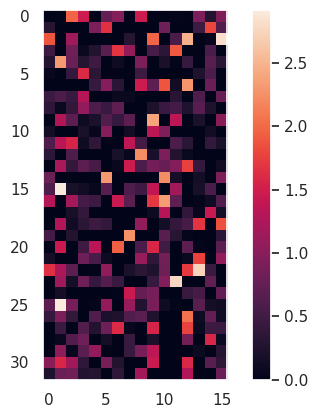

In [49]:
plt.imshow(x2.reshape((2**5, 2**4)))
plt.grid(False)
plt.colorbar()
None

In [50]:
linear_3_params = {name: param.data for name, param in model.linear_3.named_parameters()}
A3 = linear_3_params["weight"]
b3 = linear_3_params["bias"]
x3 = A3 @ x2 + b3
x3

tensor([ 6.5440,  1.5370,  2.0279,  3.5015,  0.7567, -5.2023,  3.6553, -8.0095,
        -2.2641, -4.6461])

In [51]:
def softmax(x):
    return torch.nn.functional.softmax(x, dim=0)

probas = softmax(x3)
probas

tensor([8.8950e-01, 5.9516e-03, 9.7231e-03, 4.2443e-02, 2.7274e-03, 7.0437e-06,
        4.9498e-02, 4.2525e-07, 1.3299e-04, 1.2284e-05])

In [52]:
data = {training_data.classes[i]: p.item() for i, p in enumerate(probas)}
data

{'T-shirt/top': 0.8895043730735779,
 'Trouser': 0.005951642990112305,
 'Pullover': 0.009723062627017498,
 'Dress': 0.04244314134120941,
 'Coat': 0.0027273576706647873,
 'Sandal': 7.043737696221797e-06,
 'Shirt': 0.04949767887592316,
 'Sneaker': 4.2525141452642856e-07,
 'Bag': 0.00013298862904775888,
 'Ankle boot': 1.228408746101195e-05}

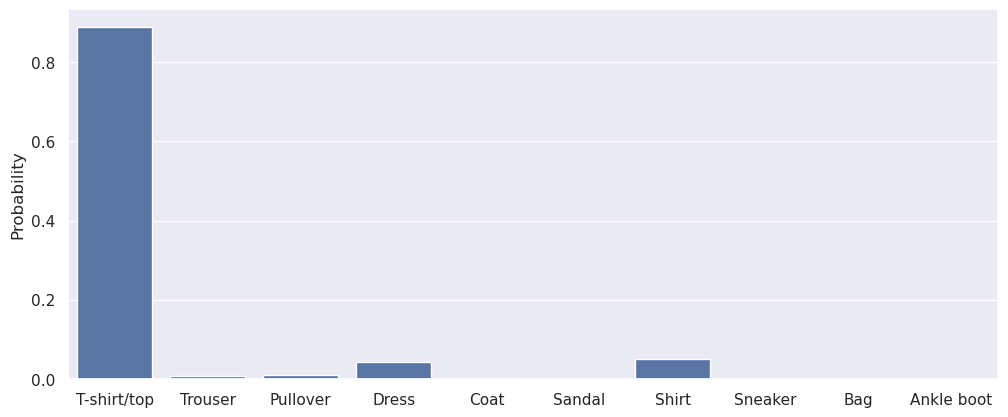

In [53]:
import seaborn as sns; sns.set_theme()
sns.barplot(data)
plt.gcf().set_figwidth(12)
plt.gca().set_ylabel("Probability")
None

In [54]:
out = model(t).squeeze()

In [55]:
ps = torch.nn.functional.softmax(out, dim=-1)

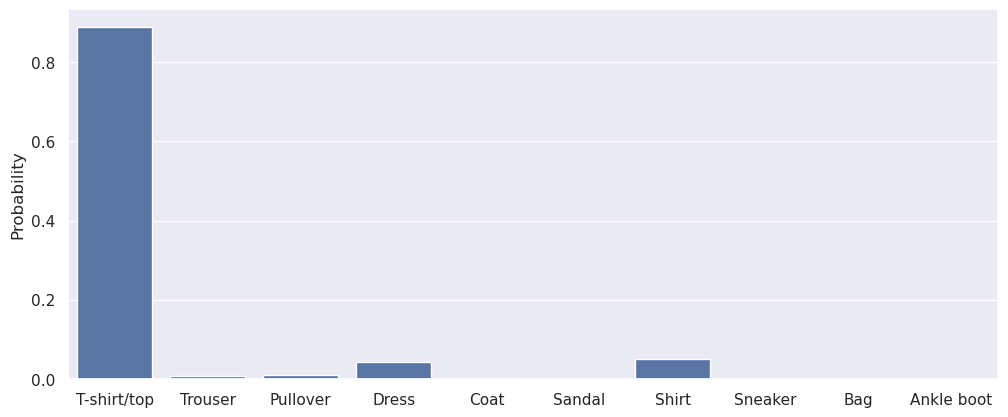

In [56]:
data = {training_data.classes[i]: p.item() for i, p in enumerate(ps)}
sns.barplot(data)
plt.gcf().set_figwidth(12)
plt.gca().set_ylabel("Probability")
None

## Training

### Loss Function

The loss function is a measure of the model prediction error: the mismatch between the output predicted by the model and the "real" output. Here, in the context of category identification, we use the cross-entropy loss function.

In [57]:
loss_function = torch.nn.CrossEntropyLoss()

It measures the differences between two probability distributions: here a computed probability distribution $p=(p_0, \dots, p_{n-1})$ and a "deterministic" distribution $q=e_i$ with
$$
e_i=(0, \dots, 0, 1, 0, \dots, 0) \;\;\; \mbox{($1$ in position $i$)}
$$
with:
$$
\mathrm{loss}(p, e_i) = - \log p_i. 
$$
The loss is zero when $p_i = 1$ (perfect match) and $-\infty$ when $p_i = 0$. It does not depend on the distribution of the $p_j$ for $j \neq i$.

```{warning}
The pytorch cross entropy function works directly with unnormalized log probabilities 
$$
\ell_i := \log p_i + c
$$
(the log probabilities up to a shared constant $c$) instead of the probabilites $p$. 
The deterministic distribution is also specified by the index $i$ instead of the vector $q=e_i$.
Hence, it actually computes
$$
\mathrm{loss}(\ell, i) := -\ell_i  + \log \left( \sum_je^{\ell_j} \right). 
$$
```


In [58]:
cross_entropy = torch.nn.CrossEntropyLoss()

In [59]:
cross_entropy(
    input=torch.tensor([1.0, 0.0]).log(), 
    target=torch.tensor(0)
)

tensor(0.)

In [60]:
cross_entropy(
    input=torch.tensor([0.0, 1.0]).log(), 
    target=torch.tensor(0)
)

tensor(inf)

In [61]:
cross_entropy(
    input=torch.tensor([0.5, 0.5]).log(), 
    target=torch.tensor(0)
)

tensor(0.6931)

In [62]:
- torch.tensor(0.5).log()

tensor(0.6931)

In [63]:
cross_entropy(
    input=torch.tensor([2/3, 1/3]).log(), 
    target=torch.tensor(0)
)

tensor(0.4055)

In [64]:
cross_entropy(
    input=torch.tensor([200.0, 100.0]).log(), 
    target=torch.tensor(0)
)

tensor(0.4055)

### Data Loader

In [65]:
batch_size = 64

# Create data loaders.
train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=batch_size)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"X = [N, C, H, W]: {X.shape}")
    print(f"y: {y.shape} {y.dtype}")
    break

X = [N, C, H, W]: torch.Size([64, 1, 28, 28])
y: torch.Size([64]) torch.int64


### Training

In [66]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [67]:
def test(dataloader, model, loss_fn):
    """
    Returns:
      - score, the probability of a correct inference on the test dataset
    """
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.2f}%, Avg loss: {test_loss:>8f} \n")
    return correct

In [68]:
model = NeuralNetwork()
model.train()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
loss_function = torch.nn.CrossEntropyLoss()

score = 0.0
new_score = test(test_dataloader, model, loss_function)
epoch = 0
keep_learning = True
while keep_learning:
    epoch += 1
    score = new_score
    print(f"Epoch {epoch+1}\n-------------------------------")
    train(train_dataloader, model, loss_function, optimizer)
    new_score = test(test_dataloader, model, loss_function)
    keep_learning = new_score > score

print("Done!")


Test Error: 
 Accuracy: 9.92%, Avg loss: 2.298352 

Epoch 2
-------------------------------
loss: 2.286515  [   64/60000]
loss: 2.277666  [ 6464/60000]
loss: 2.259991  [12864/60000]
loss: 2.263792  [19264/60000]
loss: 2.235890  [25664/60000]
loss: 2.208579  [32064/60000]
loss: 2.218146  [38464/60000]
loss: 2.180023  [44864/60000]
loss: 2.179477  [51264/60000]
loss: 2.144181  [57664/60000]
Test Error: 
 Accuracy: 41.63%, Avg loss: 2.140780 

Epoch 3
-------------------------------
loss: 2.141437  [   64/60000]
loss: 2.131345  [ 6464/60000]
loss: 2.076352  [12864/60000]
loss: 2.104254  [19264/60000]
loss: 2.032564  [25664/60000]
loss: 1.981573  [32064/60000]
loss: 2.006859  [38464/60000]
loss: 1.922766  [44864/60000]
loss: 1.935960  [51264/60000]
loss: 1.860100  [57664/60000]
Test Error: 
 Accuracy: 57.16%, Avg loss: 1.859253 

Epoch 4
-------------------------------
loss: 1.882730  [   64/60000]
loss: 1.852217  [ 6464/60000]
loss: 1.739291  [12864/60000]
loss: 1.794866  [19264/60000]
lo

In [69]:
torch.save(model.state_dict(), "models/model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth
